### This is quite a simple dataset from a kaggle competition to predict if a flight will be more than 15 minutes delayed. We will do some exploratory plotting and then use a classifier to do the prediction

The airline codes here look a bit suspicious. There is very little information about this data on the kaggle competition page
https://www.kaggle.com/c/flight-delays-spring-2018/data, so we don't know where comes from or how old it is

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
flights = pd.read_csv("flight_delays_train.csv")

In [11]:
flights.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [12]:
flights['Month'] = flights['Month'].apply(lambda x: int(x.split('-')[1]))

In [13]:
flights['DayofMonth'] = flights['DayofMonth'].apply(lambda x: int(x.split('-')[1]))
flights['DayOfWeek'] = flights['DayOfWeek'].apply(lambda x: int(x.split('-')[1]))
flights['DepTime'] = pd.to_numeric(flights['DepTime'])

In [14]:
flights.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y


In [53]:
flights['dep_delayed_15min'] = pd.get_dummies(flights['dep_delayed_15min'],drop_first=True)

### Some plotting

In [19]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [23]:
global_stats = flights['Distance'].groupby(flights['UniqueCarrier']).apply(get_stats).unstack()

In [58]:
global_stats

,count,max,mean,min
UniqueCarrier,,,,
AA,9418.0,4243.0,1079.926630,68.0
AQ,234.0,2583.0,506.307692,84.0
AS,2222.0,2846.0,868.553555,31.0
B6,1838.0,2693.0,1276.878128,187.0
CO,4334.0,4962.0,1113.829257,140.0
DH,966.0,2419.0,453.467909,157.0
DL,8128.0,4502.0,888.395423,70.0
EV,3930.0,1638.0,475.270483,64.0
F9,1006.0,2406.0,892.682903,337.0


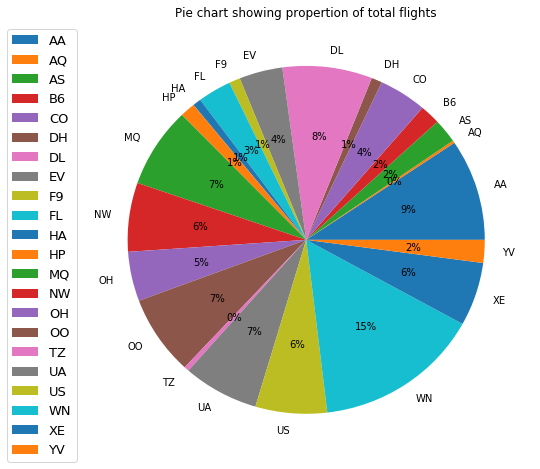

In [41]:
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(111)

sizes = global_stats['count'].values
labels = [s for s in global_stats.index]

patches, texts, autotexts = ax1.pie(sizes,
                                labels=labels, autopct='%1.0f%%',
                                shadow=False, startangle=0)
ax1.legend(bbox_to_anchor=(0., 1),fontsize=13)
ax1.set_title("Pie chart showing propertion of total flights")
plt.show()

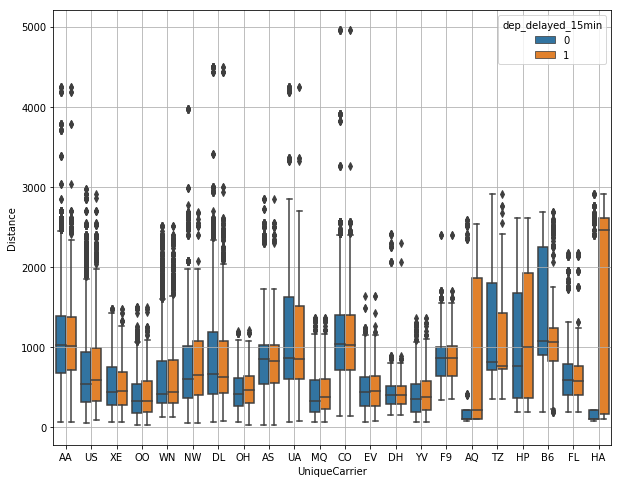

In [60]:
fig = plt.figure(1, figsize=(10,8))
ax1 = fig.add_subplot(111)
sns.boxplot(x='UniqueCarrier',y='Distance',hue='dep_delayed_15min',data=flights,ax=ax1)
ax1.grid(which='both')

The distance distributions are somewhat similar between the flights are delayed > 15 mins vs those that are delayed less than 15 mins

### Which airlines have the highest propertion of delayed flights?

In [108]:
flight_count = flights.groupby(['UniqueCarrier','dep_delayed_15min']).count()['Month']
proportions = flight_count.groupby(level=0).apply(lambda x: 100*x/x.sum())
delay_proportions = proportions.unstack().iloc[:,1]

In [112]:
delay_proportions.index

Index(['AA', 'AQ', 'AS', 'B6', 'CO', 'DH', 'DL', 'EV', 'F9', 'FL', 'HA', 'HP',
       'MQ', 'NW', 'OH', 'OO', 'TZ', 'UA', 'US', 'WN', 'XE', 'YV'],
      dtype='object', name='UniqueCarrier')

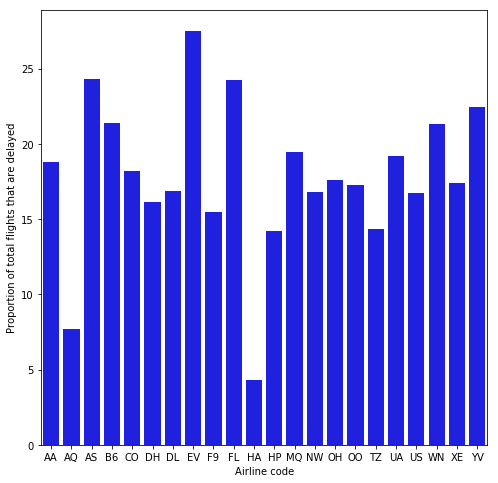

In [119]:
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(111)

sns.barplot(x=delay_proportions.index,y=delay_proportions.values,color='blue',ax=ax1)
ax1.set_xlabel("Airline code")
ax1.set_ylabel("Proportion of total flights that are delayed")
plt.show()